<a id='Top'></a>
# <center>Week 4 Lecture Notes: Estimating Recharge</center>

<ul>
    <li><a href='#Review'>Review</a></li>
    <li><a href='#Estimating Recharge'>Estimating Recharge</a></li>
</ul>






# Import this week's packages


In [1]:
# import math
import math
# import pandas with alias pd
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

<a id='Review'></a>

# Review: Pandas as an Excel substitute

Import a csv as a Pandas DataFrame. 

In [2]:
# read a csv file from the ISWS website
# 'http://aqueduct.isws.illinois.edu/data/381651_HRY-91C_hyd.csv'
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/381651_HRY-91C_hyd.csv')
wellhead

,RECORD,TIMESTAMP,depth_to_water_from_land_surface,head
0,0,2014-08-14 14:00:00,26.59,584.06
1,1,2014-08-14 15:00:00,26.58,584.07
2,2,2014-08-14 16:00:00,26.58,584.07
3,3,2014-08-14 17:00:00,26.59,584.06
4,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92
53993,67283,2020-11-20 11:00:00,11.73,598.92
53994,67284,2020-11-20 12:00:00,11.73,598.92
53995,67285,2020-11-20 13:00:00,11.73,598.92


Convert the TIMESTAMP to a datetime

In [3]:
wellhead['TIMESTAMP'] = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead



,RECORD,TIMESTAMP,depth_to_water_from_land_surface,head
0,0,2014-08-14 14:00:00,26.59,584.06
1,1,2014-08-14 15:00:00,26.58,584.07
2,2,2014-08-14 16:00:00,26.58,584.07
3,3,2014-08-14 17:00:00,26.59,584.06
4,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92
53993,67283,2020-11-20 11:00:00,11.73,598.92
53994,67284,2020-11-20 12:00:00,11.73,598.92
53995,67285,2020-11-20 13:00:00,11.73,598.92


It isn't always this easy, sometimes it takes a bit more formatting to get the datetime to convert properly. However, once a TIMESTAMP is converted to a datetime, it is easy to extract days, months, years, etc. 

In [4]:
print(wellhead['TIMESTAMP'][0].year)
print(wellhead['TIMESTAMP'][0].month)
print(wellhead['TIMESTAMP'][0].day)
print(wellhead['TIMESTAMP'][0].hour)
print(wellhead['TIMESTAMP'][0].minute)
print(wellhead['TIMESTAMP'][0].second)

2014
8
14
14
0
0


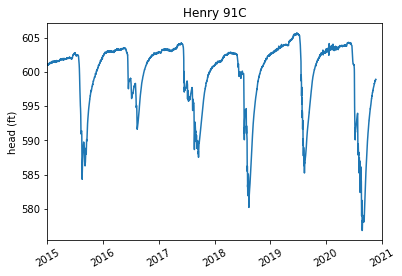

In [5]:
plt.plot(wellhead['TIMESTAMP'],wellhead['head'])
plt.xlim([datetime.datetime(2015,1,1),datetime.datetime(2021,1,1)])
plt.title('Henry 91C')
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

## Resampling

Sometimes, you may not want to deal with all data, but instead take an average over a period of time. This is called resampling or binning the data, and this can be done with the timestamp object with a single line of code!

In [6]:
# this code resamples the dataframe to an annual average water level
wellhead_yr = wellhead.resample('Y').mean()
print(wellhead_yr)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

Note the error here, that to resample, the index has to be formatted like a DateTime (or something similar). We have already seen in an earlier lecture how to do this, we just need to set the index equal to the TimeStamp.

In [10]:
#reassign the index to the TIMESTAMP
wellhead.index = wellhead['TIMESTAMP']
# this code resamples the dataframe to an annual average water level
wellhead_yr = wellhead.resample('Y').mean()
wellhead_yr

,RECORD,depth_to_water_from_land_surface,head
TIMESTAMP,,,
2014-12-31,1665.500000,14.707761,595.942236
2015-12-31,7711.500000,11.298626,599.351369
2016-12-31,16376.000000,9.643949,601.006050
2017-12-31,37584.630543,11.516226,599.133774
2018-12-31,46354.995890,11.783628,598.866373
2019-12-31,55115.160064,9.457601,601.192396
2020-12-31,63369.422621,13.014673,597.635328


The mean over a year (`Y`) was taken in every column, which isn't meaningful for the record (which was a unique id that has no physical meaning), but is very helpful for the head. Data can be resampled over other different time intervals as well, including `D` for day, `W` for week, and `M` for month. You can do a google search to find other options as well, although we won't be using those this semester (at least for the next few weeks)

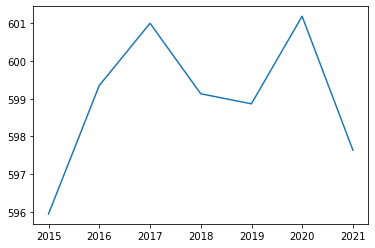

In [12]:
plt.plot(wellhead_yr.index,wellhead_yr['head'])

This tells us that the highest water levels (on average) occurred in 2016 and 2019; the lowest occurred in 2014 and 2020. In your homework, you are going to compare this to precipitation data in each year. I don't know what this will actually show; it could be interesting!

## Now try this on your own!

<b>Q1:</b> Try plotting up the maximum and minimum elevations observed in each year at Henry 91C.

<b>ANSWER 1</b>

<AxesSubplot:xlabel='TIMESTAMP'>

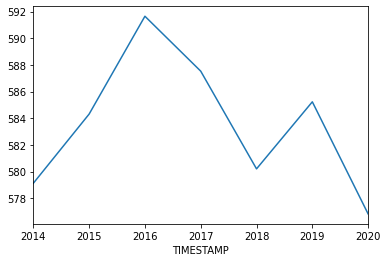

In [17]:
# like above, but instead we use .min() or .max()
wellhead_yr = wellhead.resample('Y').min() #.max()
# Note that I am using a shortcut to plot the data in the dataframe, which uses the index for the time axis automatically.
# This format can be limiting, but feel free to explore this formatting on your own to discover those
wellhead_yr['head'].plot()

<b>Q2</b>: What month had the lowest water levels in the year 2019?

<b>ANSWER 2</b>

After plotting up 2019 data, it appears that the lowest water levels occured in August in 2019.

(588.0, 599.0)

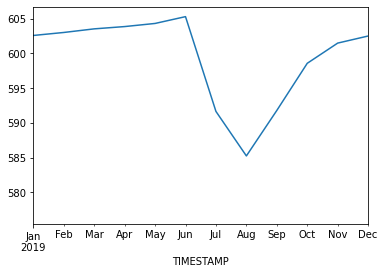

In [28]:
# like above, but instead we use .min() or .max()
wellhead_yr = wellhead.resample('M').min() #.max()
# Note that I am using a shortcut to plot the data in the dataframe, which uses the index for the time axis automatically.
# This format can be limiting, but feel free to explore this formatting on your own to discover those
wellhead_yr['head'].plot()
plt.xlim([datetime.datetime(2019,1,1),datetime.datetime(2019,12,31)])


<a id='Estimating Recharge'></a>

# Estimating Recharge

After a precipitation event, a portion of the water vertically infiltrates to the aquifer, known as recharge. Recharge is measured in the same units as precipitation (length per time, commonly inches per year).  

Employing hydrographs, we are going to use a simple hydrogeologic analysis known as the Water Table Fluctuation method (https://water.usgs.gov/ogw/gwrp/methods/wtf/#:~:text=Water-Table%20Fluctuation%20%28WTF%29%20Method%20The%20water-table%20fluctuation%20%28WTF%29,the%20addition%20of%20recharge%20across%20the%20water%20table.). The concept is simple, changes in groundwater head <b>might</b> indicate a change in recharge, although other factors such as pumping or changes in stream levels could also be influencing this change. Let's not worry about that now.

The idea is to apply transient mass balance concepts to estimate recharge as follows:

$R=\frac{\Delta h S_y}{t}$

where $R$ is recharge ($ft/d$), $\Delta h$ is change in head ($ft$), $S_y$ is specific yield (unitless), and time is the interval over which the head change was observed ($d$). <b>Only positive recharge is generally considered</b>

Let's see how this looks on a data set from the ISWS for a monitoring well in Mason County, resampled to capture the water level every week.

In [30]:
# https://www.isws.illinois.edu/groundwater-science/groundwater-monitoring-well-networks/imperial-valley
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/360669.csv')
wellhead.index = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead

,TIMESTAMP,GWE,method
TIMESTAMP,,,
1995-03-01 00:00:00,1995-03-01 00:00:00,479.43000,Hand Measurement
1995-04-01 00:00:00,1995-04-01 00:00:00,479.60000,Hand Measurement
1995-05-01 00:00:00,1995-05-01 00:00:00,479.89000,Hand Measurement
1995-06-01 00:00:00,1995-06-01 00:00:00,483.74000,Hand Measurement
1995-07-01 00:00:00,1995-07-01 00:00:00,483.80000,Hand Measurement
...,...,...,...
2020-09-25 10:00:00,2020-09-25 10:00:00,477.12691,Transducer
2020-09-25 12:00:00,2020-09-25 12:00:00,477.14457,Transducer
2020-09-25 13:00:00,2020-09-25 13:00:00,477.14915,Transducer


A couple of notes on this. GWE is Groundwater Elevation, in feet above mean sea level. There is no depth to water, and the measurement method is included as well. You can see right away that the weekly measurements are originally taken by hand, but end with mostly transducer readings. The transducer (which measures water levels continuously) failed in late September of last year, but there is a hand measurement in December.

When we do a weekly resampling, you will notice some major changes to the structure of this DataFrame.

In [31]:
wellhead_w = wellhead.resample('W').mean()
print(wellhead_w)

               GWE
TIMESTAMP         
1995-03-05  479.43
1995-03-12     NaN
1995-03-19     NaN
1995-03-26     NaN
1995-04-02  479.60
...            ...
2021-01-03     NaN
2021-01-10     NaN
2021-01-17     NaN
2021-01-24     NaN
2021-01-31  474.65

[1353 rows x 1 columns]


We see a lot of NaN's. That simply represents weeks for which no data exists. However, we can still plot this data.

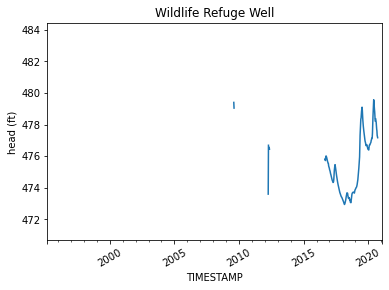

In [32]:
# default is to plot a continuous line
wellhead_w.GWE.plot()
plt.title('Wildlife Refuge Well')
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

There is a lot of missing data that will prove problematic here.  Option 1 is to plot points, which are missed with this continuous line. 

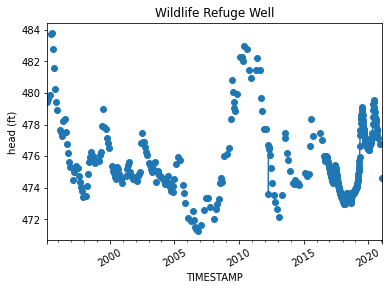

In [34]:
# we can assign points so that we can see all the data
wellhead_w.GWE.plot(marker='o')
plt.title('Wildlife Refuge Well')
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

For our analysis, let's just use the (continuous) transducer data. This brings up a new important concept- how to trim a dataframe based on a certain condition. In this case, we want a new dataframe that only includes tranducer data. This is relatively easy to do, and the code takes the following form:

In [35]:
wellhead2 = wellhead[wellhead['method']=='Transducer']
wellhead2

,TIMESTAMP,GWE,method
TIMESTAMP,,,
2016-08-24 10:00:00,2016-08-24 10:00:00,475.83576,Transducer
2016-08-24 11:00:00,2016-08-24 11:00:00,475.83372,Transducer
2016-08-24 12:00:00,2016-08-24 12:00:00,475.83812,Transducer
2016-08-24 13:00:00,2016-08-24 13:00:00,475.84197,Transducer
2016-08-24 14:00:00,2016-08-24 14:00:00,475.84347,Transducer
...,...,...,...
2020-09-22 15:00:00,2020-09-22 15:00:00,NaN,Transducer
2020-09-22 16:00:00,2020-09-22 16:00:00,NaN,Transducer
2020-09-25 10:00:00,2020-09-25 10:00:00,477.12691,Transducer


This syntax might take a little getting used to, but let's break it down. The code `wellhead['method']=='Transducer'` determines for each line in the dataframe where the relationship is true or false, and is accompanied by the index of the dataframe. 

In [36]:
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/360669.csv')
wellhead.index = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead['method']=='Transducer'

TIMESTAMP
1995-03-01 00:00:00    False
1995-04-01 00:00:00    False
1995-05-01 00:00:00    False
1995-06-01 00:00:00    False
1995-07-01 00:00:00    False
                       ...  
2020-09-25 10:00:00     True
2020-09-25 12:00:00     True
2020-09-25 13:00:00     True
2020-12-01 11:02:00    False
2021-01-28 11:16:00    False
Name: method, Length: 35170, dtype: bool

The following code takes this binary `True` and `False` output and selects from the dataframe only those lines where the condition is true. 

In [37]:
wellhead[wellhead['method']=='Transducer']

,TIMESTAMP,GWE,method
TIMESTAMP,,,
2016-08-24 10:00:00,2016-08-24 10:00:00,475.83576,Transducer
2016-08-24 11:00:00,2016-08-24 11:00:00,475.83372,Transducer
2016-08-24 12:00:00,2016-08-24 12:00:00,475.83812,Transducer
2016-08-24 13:00:00,2016-08-24 13:00:00,475.84197,Transducer
2016-08-24 14:00:00,2016-08-24 14:00:00,475.84347,Transducer
...,...,...,...
2020-09-22 15:00:00,2020-09-22 15:00:00,NaN,Transducer
2020-09-22 16:00:00,2020-09-22 16:00:00,NaN,Transducer
2020-09-25 10:00:00,2020-09-25 10:00:00,477.12691,Transducer


Similarly, we could create a dataframe where elevations are only greater than a value (let's just use 476 ft as an example) using the following code:

In [38]:
wellhead[wellhead['GWE']>476]

,TIMESTAMP,GWE,method
TIMESTAMP,,,
1995-03-01 00:00:00,1995-03-01 00:00:00,479.43000,Hand Measurement
1995-04-01 00:00:00,1995-04-01 00:00:00,479.60000,Hand Measurement
1995-05-01 00:00:00,1995-05-01 00:00:00,479.89000,Hand Measurement
1995-06-01 00:00:00,1995-06-01 00:00:00,483.74000,Hand Measurement
1995-07-01 00:00:00,1995-07-01 00:00:00,483.80000,Hand Measurement
...,...,...,...
2020-09-22 13:00:00,2020-09-22 13:00:00,477.18900,Transducer
2020-09-25 10:00:00,2020-09-25 10:00:00,477.12691,Transducer
2020-09-25 12:00:00,2020-09-25 12:00:00,477.14457,Transducer


We've been experimenting a lot with this dataframe, so just to make sure, let's re-run our code in a single block, from importing data to resampling weekly. 

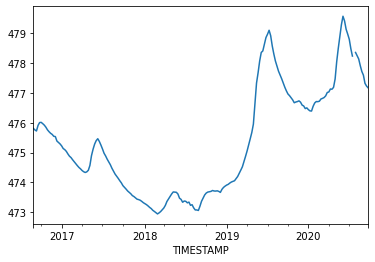

In [42]:
dstart = datetime.datetime(2015,4,1)


wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/360669.csv')
wellhead.index = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead = wellhead[wellhead['method']=='Transducer']
wellhead_w = wellhead.resample('W').mean()
wellhead_w.GWE.plot()
# you may want to experiment with what plt.show() actually does here be commenting it on or off
plt.show()


### Calculating $\Delta h$

Now let's calculate the head differences between points in time. 

We need to calculate the difference in the average heads over each weekly interval. To do this, we simply take the difference between the head and the shifted head using the function `shift()`. 

In [43]:
print(wellhead_w)

                   GWE
TIMESTAMP             
2016-08-28  475.811092
2016-09-04  475.759444
2016-09-11  475.723483
2016-09-18  475.909658
2016-09-25  476.006363
...                ...
2020-08-30  477.717467
2020-09-06  477.593314
2020-09-13  477.318871
2020-09-20  477.228369
2020-09-27  477.168958

[214 rows x 1 columns]


In [44]:
wellhead_w['deltah'] = wellhead_w['GWE']-wellhead_w['GWE'].shift()
wellhead_w

,GWE,deltah
TIMESTAMP,,
2016-08-28,475.811092,NaN
2016-09-04,475.759444,-0.051648
2016-09-11,475.723483,-0.035961
2016-09-18,475.909658,0.186175
2016-09-25,476.006363,0.096704
...,...,...
2020-08-30,477.717467,-0.195199
2020-09-06,477.593314,-0.124153
2020-09-13,477.318871,-0.274443


Okay, I intentionally tackled a few steps there, but we need to walk through that again. What is shift doing here? Let's take a closer look:

In [45]:
#here is the original data
wellhead_w['GWE']

TIMESTAMP
2016-08-28    475.811092
2016-09-04    475.759444
2016-09-11    475.723483
2016-09-18    475.909658
2016-09-25    476.006363
                 ...    
2020-08-30    477.717467
2020-09-06    477.593314
2020-09-13    477.318871
2020-09-20    477.228369
2020-09-27    477.168958
Freq: W-SUN, Name: GWE, Length: 214, dtype: float64

In [46]:
# and the shifted data
wellhead_w['GWE'].shift()

TIMESTAMP
2016-08-28           NaN
2016-09-04    475.811092
2016-09-11    475.759444
2016-09-18    475.723483
2016-09-25    475.909658
                 ...    
2020-08-30    477.912667
2020-09-06    477.717467
2020-09-13    477.593314
2020-09-20    477.318871
2020-09-27    477.228369
Freq: W-SUN, Name: GWE, Length: 214, dtype: float64

The index does not change, nor does the length. However, the first value has been pushed down by one, replaced with an NaN. NaN's are just Pandas/Pythons way of defining "Not a Number", we'll take care of that next. 

What are we really doing by shifting values? Well, if we subtract the two columns from one another, we are really taking the difference from the head in the previous day (given by the shifted value) and the head in the current day (given by the unshifted value). In other words, the difference on `2016-09-04` between the two is 475.76 (the actual head on that day) minus 475.81 (the head on the previous day). The head went down in this case, so the negative sign that is yielded by the difference makes sense.  

Scrolling back up, you can see that the value calculated as `delta h` for the first time interval is an `NaN`. Our next math steps will become complicated when NaNs are present, as happens in the first delta_h. Let's fill that value in with a float by backfilling values (NaNs are set equal to the next value). 

In [47]:
wellhead_w = wellhead_w.fillna(method='bfill')
print(wellhead_w)

                   GWE    deltah
TIMESTAMP                       
2016-08-28  475.811092 -0.051648
2016-09-04  475.759444 -0.051648
2016-09-11  475.723483 -0.035961
2016-09-18  475.909658  0.186175
2016-09-25  476.006363  0.096704
...                ...       ...
2020-08-30  477.717467 -0.195199
2020-09-06  477.593314 -0.124153
2020-09-13  477.318871 -0.274443
2020-09-20  477.228369 -0.090502
2020-09-27  477.168958 -0.059411

[214 rows x 2 columns]


### Estimate recharge
Recall that our goal is to calculate recharge usig the Water Table Fluctuation method, which requires specific yield $S_y$ and time interval $\Delta t$. For simplicity, let's assume that $S_y$ is equal to 0.2 (we will see later if this actually makes sense) and a time interval of 7 days (consistent with our resampling of 1 week).

In [49]:
sy = 0.2
timeint = 7

wellhead_w['recharge'] = sy*wellhead_w['deltah']/timeint
print(wellhead_w)


                   GWE    deltah  recharge
TIMESTAMP                                 
2016-08-28  475.811092 -0.051648 -0.001476
2016-09-04  475.759444 -0.051648 -0.001476
2016-09-11  475.723483 -0.035961 -0.001027
2016-09-18  475.909658  0.186175  0.005319
2016-09-25  476.006363  0.096704  0.002763
...                ...       ...       ...
2020-08-30  477.717467 -0.195199 -0.005577
2020-09-06  477.593314 -0.124153 -0.003547
2020-09-13  477.318871 -0.274443 -0.007841
2020-09-20  477.228369 -0.090502 -0.002586
2020-09-27  477.168958 -0.059411 -0.001697

[214 rows x 3 columns]


<AxesSubplot:xlabel='TIMESTAMP'>

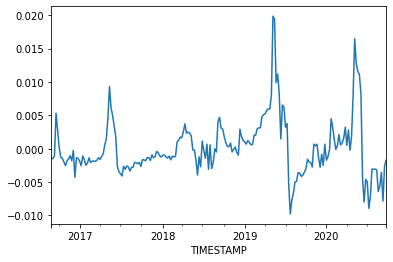

In [50]:
wellhead_w['recharge'].plot()

So close, but there are a lot of negative recharge values here. The Water Table Fluctation method as defined by the USGS as only positive recharge values, negative values should be set to 0 recharge.

Here's a nifty little code that does this for you.

<AxesSubplot:xlabel='TIMESTAMP'>

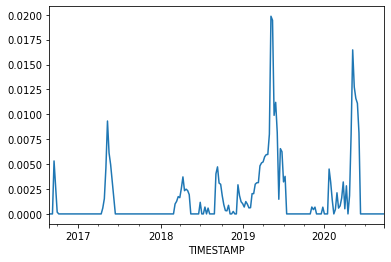

In [51]:
# Write a code that sets negative values equal to zero
wellhead_w[wellhead_w['recharge']<0]=0
wellhead_w['recharge'].plot()

### Plot head and recharge data

We want to observe the relationship between head changes and recharge. Let's plot both up. Note that we add a title based on the original url. 

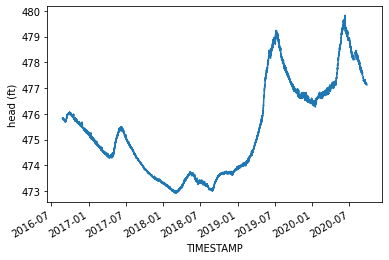

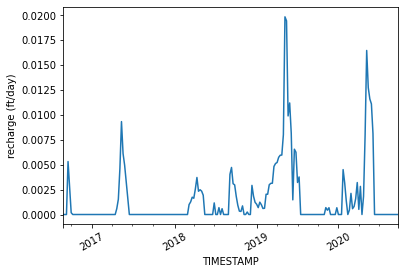

In [53]:
# plot a line at a time
wellhead.GWE.plot()
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

plt.figure()
wellhead_w.recharge.plot()
plt.ylabel('recharge (ft/day)')
plt.xticks(rotation = 30)
plt.show()


The above plots are difficult to compare because the curves aren't on the same line. Using a slightly more complicated code, we can plot both heads and recharge on the same plot using different y-axes. 

I'll post a supplemental video discussing the details of this code. For now, you should be able to copy, paste, and modify. 

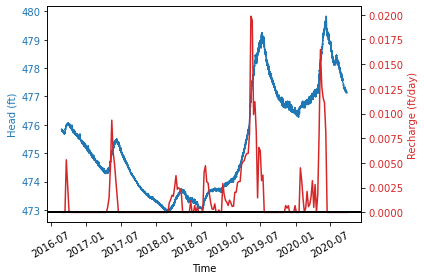

In [54]:
# Define a figure the primary axis
fig, ax1 = plt.subplots()

# There are a different set of functions/methods for defining properties of the primary axis. 
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Head (ft)', color=color)
ax1.plot(wellhead.GWE, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=30)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Recharge (ft/day)', color=color)  # we already handled the x-label with ax1
ax2.plot(wellhead_w.recharge, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(linewidth=2, color='k')



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## You now have everything you need to start on Week 4's Homework assignment.